<a href="https://colab.research.google.com/github/ehdwls314/prac_class/blob/main/R_practice_2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling (tidyr)

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Example datasets

In [ ]:
table1

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [ ]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [ ]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [ ]:
table4a # N. cases

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,745,2666
2,Brazil,37737,80488
3,China,212258,213766


In [ ]:
table4b # N. population

,country,1999,2000
,<chr>,<int>,<int>
1,Afghanistan,19987071,20595360
2,Brazil,172006362,174504898
3,China,1272915272,1280428583


## pivot_longer() 

One variable might be spread across multiple columns

Apply pivot_longer() to table4a

In [ ]:
table4a %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")


country,year,cases
<chr>,<chr>,<int>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


apply it to table4b

In [ ]:
table4b %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")


country,year,population
<chr>,<chr>,<int>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


Join two tables

In [ ]:
tidy4a <- table4a %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
tidy4b <- table4b %>% 
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")
left_join(tidy4a, tidy4b)


Joining, by = c("country", "year")



country,year,cases,population
<chr>,<chr>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [ ]:
?right_join

### Q: What is right_join? try ?right_join and study join methods

## Pivot_wider()

One observation might be scattered across multiple rows

In [ ]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [ ]:
table2 %>% pivot_wider(names_from = type, values_from = count)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Separating and Uniting 

## separate()

One column contains two variables 

In [ ]:
table3 

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [ ]:
table3 %>% separate(rate, into = c("cases", "population"))

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [ ]:
table3 %>% separate(rate, into = c("cases", "population"))%>%mutate(cases = as.numeric(cases),populations = as.numeric(population))

## unite()

Single variable is spread across multiple columns

In [ ]:
table5

,country,century,year,rate
,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,19,99,745/19987071
2,Afghanistan,20,00,2666/20595360
3,Brazil,19,99,37737/172006362
4,Brazil,20,00,80488/174504898
5,China,19,99,212258/1272915272
6,China,20,00,213766/1280428583


In [ ]:
table5 %>% 
  unite(new, century, year, sep = "")


country,new,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


# Functional Programming

In [ ]:
df <- tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)

In [ ]:
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
0.6011658,0.25885333,-1.24379821,-1.1419055
0.4250514,-0.25668019,0.80805005,-0.3499681
0.2997178,0.79144662,-1.40379981,-2.0680614
-0.3927127,0.04606622,-0.70165445,0.1208412
-1.5233367,1.50882482,-0.80300023,-0.1938526
0.5663507,-1.72531380,-1.50788983,0.1492770
0.8039411,0.59072605,2.03166106,0.1088852
-0.7506775,-0.48159033,0.06958358,-1.8078971
-0.8886639,1.28318093,-0.62887517,-0.5970992


In [ ]:
class(df)

[1] "tbl_df"     "tbl"        "data.frame"

In [ ]:
median(df$a)
#> [1] -0.2457625
median(df$b)
#> [1] -0.2873072
median(df$c)
#> [1] -0.05669771
median(df$d)
#> [1] 0.1442633

[1] 0.09065315

[1] 0.4135802

[1] -0.6652648

[1] -0.2719103

Don't copy and paste multiple times  
You can iterate using for loops


In [ ]:
output <- vector("double", ncol(df)) 
output

[1] 0 0 0 0

In [ ]:
output <- vector("double", ncol(df))  # 1. output
for (i in seq_along(df)) {            # 2. sequence
  output[[i]] <- median(df[[i]])      # 3. body
}
output


[1]  0.09065315  0.41358018 -0.66526481 -0.27191035

In [ ]:
output <- c()
output

NULL

In [ ]:
output <- c()
for (i in seq_along(df)) {            # 2. sequence
  output <- c( output, median(df[[i]]) )      # 3. body
}
output


[1]  0.09065315  0.41358018 -0.66526481 -0.27191035

In [ ]:
install.packages("rbenchmark")
library(rbenchmark)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

simple1 <- function(n) {
  output <- vector("double", n)
  for(i in 1:n) 
    output[i] = i
  return(output)
} 

simple2 <- function(n) {
  output <- c()
  for(i in 1:n) 
    output = c(output, i)
  return(output)
} 


In [ ]:
simple1(3)

[1] 1 2 3

In [ ]:
simple2(3)

[1] 1 2 3

In [ ]:
benchmark("fc1"=simple1(1000),
          "fc2"=simple2(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.006,100
2,fc2,0.217,100


## for_loops vs functional

Possible to wrap up for loops in a function


In [ ]:
col_mean <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- mean(df[[i]])
  }
  output
}

col_median <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- median(df[[i]])
  }
  output
}

col_sd <- function(df) {
  output <- vector("double", ncol(df)) 
  for (i in seq_along(df)) {
    output[[i]] <- sd(df[[i]])
  }
  output
}

col_mean(df)

[1] -0.09775756  0.25838207 -0.35712916 -0.52346668

You can make function as a variable

In [ ]:
col_summary <- function(df, fun) {
  out <- vector("double", length(df))
  for (i in seq_along(df)) {
    out[i] <- fun(df[[i]])
  }
  out
}
col_summary(df, median)


[1]  0.09065315  0.41358018 -0.66526481 -0.27191035

## The map function (purrr)

the purrr package provides a family of functions for looping patterns over a vector

remind apply()

In [ ]:
str(df)

tibble [10 × 4] (S3: tbl_df/tbl/data.frame)
 $ a: num [1:10] 0.601 0.425 0.3 -0.393 -1.523 ...
 $ b: num [1:10] 0.2589 -0.2567 0.7914 0.0461 1.5088 ...
 $ c: num [1:10] -1.244 0.808 -1.404 -0.702 -0.803 ...
 $ d: num [1:10] -1.142 -0.35 -2.068 0.121 -0.194 ...


In [ ]:
df %>% map_dbl(mean)

a           b           c           d 
-0.09775756  0.25838207 -0.35712916 -0.52346668

In [ ]:
df %>% map(~mean(.))

$a
[1] -0.09775756

$b
[1] 0.2583821

$c
[1] -0.3571292

$d
[1] -0.5234667

In [ ]:
df %>% map(mean)

$a
[1] -0.09775756

$b
[1] 0.2583821

$c
[1] -0.3571292

$d
[1] -0.5234667

In [ ]:
df %>% map_dbl(median)

a           b           c           d 
 0.09065315  0.41358018 -0.66526481 -0.27191035

In [ ]:
mtcars %>% 
  split(.$cyl)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


In [ ]:
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}
mtcars %>% 
  split(.$cyl) %>% 
  map(f1)

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



You can define a function in map

In [ ]:
mtcars %>% 
  split(.$cyl) %>% 
  map(function(df) lm(mpg ~ wt, data = df))


$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [ ]:
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}
mtcars %>% 
  split(.$cyl) %>% 
  map(f1)

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [ ]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .))


$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



## Extract Component

In [ ]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .))

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [ ]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% 
  map(summary)

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1513 -1.9795 -0.6272  1.9299  5.2523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   39.571      4.347   9.104 7.77e-06 ***
wt            -5.647      1.850  -3.052   0.0137 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.332 on 9 degrees of freedom
Multiple R-squared:  0.5086,	Adjusted R-squared:  0.454 
F-statistic: 9.316 on 1 and 9 DF,  p-value: 0.01374


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
     Mazda RX4  Mazda RX4 Wag Hornet 4 Drive        Valiant       Merc 280 
       -0.1250         0.5840         1.9292        -0.6897         0.3547 
     Merc 280C   Ferrari Dino 
       -1.0453        -1.0080 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   28.409      4.184   6.789  0.00105 **
wt            -2.780      1.335  -2.083  0.09176 . 
---
Signif.

In [ ]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% 
  map(summary) %>% 
  map_dbl(~.$r.squared)


4         6         8 
0.5086326 0.4645102 0.4229655

In [ ]:
mtcars %>% 
  split(.$cyl) %>% 
  map(~lm(mpg ~ wt, data = .)) %>% 
  map(summary) %>% 
  map_dbl('r.squared')


4         6         8 
0.5086326 0.4645102 0.4229655

You can also use an integer to select elements by position

In [ ]:
x <- list(list(1, 2, 3), list(4, 5, 6), list(7, 8, 9))
x %>% map_dbl(2)
#> [1] 2 5 8


[1] 2 5 8

In [ ]:
x

[[1]]
[[1]][[1]]
[1] 1

[[1]][[2]]
[1] 2

[[1]][[3]]
[1] 3


[[2]]
[[2]][[1]]
[1] 4

[[2]][[2]]
[1] 5

[[2]][[3]]
[1] 6


[[3]]
[[3]][[1]]
[1] 7

[[3]][[2]]
[1] 8

[[3]][[3]]
[1] 9

Functional Programming is memory efficient by not saving internal calculations. Easier to understand if you get used to it. 

Is it fater as well? 

In [ ]:
n_len = 10

In [ ]:
rep(10,n_len) %>% map(~rnorm(.))

[[1]]
 [1]  1.0964199 -0.8345404 -0.7622899 -0.8403997  0.4280193  0.8890146
 [7] -0.2850809 -0.1938224 -1.3739396  1.0295546

[[2]]
 [1] -1.48272872  0.31279140 -1.75082583  1.40523062 -0.15088431 -0.96633788
 [7] -0.09024663  0.03395701  0.47993824 -0.03486107

[[3]]
 [1] -0.09613723  0.41448459  1.29513937  0.14694598 -1.87206490  0.21118673
 [7] -0.50507852  1.32221612 -2.21958724 -0.19658081

[[4]]
 [1]  1.51640669 -1.06029653 -0.06588620  0.61336733 -0.34292058 -0.30817188
 [7] -0.01486385  1.36099846 -0.90014813  1.47777098

[[5]]
 [1] -0.93371660 -0.90772123  0.54722804 -0.05507078 -0.80211727  0.69043553
 [7]  0.40228854 -0.81303797  1.01679461 -0.22692033

[[6]]
 [1]  0.1254708  0.5516998  0.6171998  0.8749426 -1.0972979 -0.1770033
 [7]  0.0371216 -0.4441020 -0.4606649 -0.7641879

[[7]]
 [1] -0.38669346 -1.30128823 -0.21471862  0.09095006 -1.29932437  0.97270324
 [7]  0.89748740 -0.72955992  1.38806067 -1.38703269

[[8]]
 [1]  0.6837739 -0.6509519 -1.7931536  0.6436397  1.2393225 -1.2851723
 [7]  0.3515233  0.3284196  1.1286877 -1.2149365

[[9]]
 [1] -0.76126921 -0.38355705  0.52773725 -0.65956266  1.44649312  0.12502698
 [7] -0.07593430  0.81905598  0.54732651 -0.09282765

[[10]]
 [1] -1.31341873 -0.81366677  0.48927234  0.06757453  1.22815257  0.62320727
 [7]  0.84156330  0.50879427  0.34653860 -0.70981019

In [ ]:
df2 <- vector(mode = "list", length = n_len)
for (i in 1:n_len)
  df2[[i]] <- rnorm(10)
df2

[[1]]
 [1] -0.9619511 -1.4949028  0.3218584 -0.9847577  0.5155613  0.8198167
 [7] -1.0618204 -0.9502635 -1.5658011  0.7454581

[[2]]
 [1] -1.55462803  0.29725199  0.71162864  0.36090217  0.67160099  0.99613150
 [7] -0.92350043 -1.52865393 -0.00826174 -0.48052519

[[3]]
 [1] -1.1725349  1.3472058  0.2380555 -1.7591671 -0.4264939  2.2221792
 [7]  0.8541735  0.3223566  1.4901192  0.2885833

[[4]]
 [1]  0.46654955 -0.13311681  0.37170959  1.02300349  0.24923336 -0.25795935
 [7] -0.61809020  0.19370079  0.04125332 -2.43516334

[[5]]
 [1] -0.22350464 -0.09248994  1.49074837  0.14162374  0.39851103 -1.17648543
 [7]  0.82170250 -1.48599709  0.20916798 -0.45623258

[[6]]
 [1]  0.4237558 -0.7246478 -0.4254956  1.4395048  0.6624721  0.2852093
 [7]  1.4768989 -0.7385769  0.9968067  0.6883455

[[7]]
 [1] -1.5668893 -0.8240554 -0.5403663 -0.5024333 -0.6113774 -0.7499269
 [7]  0.8136815 -0.3690756 -0.5537564 -0.4355771

[[8]]
 [1] -0.36950578 -0.99795868 -0.09794686  0.40152335 -0.36445835 -0.57846815
 [7]  0.77434921 -0.22405496 -2.76263040 -0.66602376

[[9]]
 [1]  0.51310284  0.19825265  0.36595341  0.29421995 -1.57451227  0.56741427
 [7] -0.09671220 -0.33554246  0.09537736 -1.84262217

[[10]]
 [1]  0.11188778 -1.32095786  0.52451622 -0.38194698 -0.48574265 -1.14280369
 [7] -0.06271319 -1.42747154  0.24154173  0.63101195

In [ ]:
lapply(rep(10,n_len), rnorm )

[[1]]
 [1] -0.7751687 -1.0348076  0.4653897  1.3108845 -0.2377788 -0.2046478
 [7]  0.5593450  0.9817011 -0.8870602 -1.4009524

[[2]]
 [1] -0.2215025  0.9222284 -0.3562517 -0.2145799 -0.9454565 -0.9282931
 [7]  1.5947758  0.3389931  0.5050583 -1.1357131

[[3]]
 [1] -0.961405259 -0.872434126  0.007757143  0.660740569 -1.896957383
 [6]  0.336663230  0.193242990  0.652641766 -1.193374285  0.412478817

[[4]]
 [1]  0.2083691  1.2357511 -0.8345874  0.7307796 -0.3320621 -1.8515715
 [7] -0.5300273 -1.1803580  0.8611172 -0.3682073

[[5]]
 [1]  0.679085974 -3.158799116  0.202544793  0.008457941 -0.004877862
 [6]  0.234962927 -1.808370179 -1.007743607  1.142380729 -1.689801621

[[6]]
 [1]  0.27341463 -1.92112268  0.57216954 -1.04910492 -0.30994648  0.52681043
 [7] -0.45884133 -2.31715293 -0.86854287  0.06109879

[[7]]
 [1] -0.6867771 -1.6022148 -1.3949449 -2.1248016  0.1125041 -0.6916010
 [7] -0.4561848  0.9060142  0.6071426  0.7704151

[[8]]
 [1]  0.04928034 -0.08488284 -0.63816168  0.62313239 -0.20334972  2.19689320
 [7] -0.38096854  0.53792028 -1.59685149 -2.09551279

[[9]]
 [1]  0.3372052 -0.3551174  0.9532450 -1.3378909  1.1720514 -2.3137016
 [7]  2.5016203  0.6685123  0.2647750 -0.5440732

[[10]]
 [1]  0.9354010 -1.8902088  1.0555797 -2.0372906  0.2498942 -1.1733317
 [7]  0.9371579 -0.7279741  0.4639386  0.8961520

In [ ]:
gen1 <- function(n_len) {
  rep(10,n_len) %>% map(~rnorm(.))
}

In [ ]:
gen2 <- function(n_len) {
  df2 <- vector(mode = "list", length = n_len)
  for (i in 1:n_len)
    df2[[i]] <- rnorm(10)
  df2
}

In [ ]:
gen3 <- function(n_len) {
  lapply(rep(10,n_len), rnorm )
}

In [ ]:
gen1(5)

[[1]]
 [1] -0.18557048  0.05852552 -0.09233805  1.07529904 -0.59099128  0.66808391
 [7]  0.82270363 -0.49634710  0.62294131  1.44674514

[[2]]
 [1]  1.5702140  0.8113112 -0.0532503  0.1527631  0.7262115  0.4832978
 [7] -0.3315868  1.4574075  1.3007967  0.5237495

[[3]]
 [1] -0.5406837 -0.2648861 -2.3852336 -0.8497954 -0.5265424  0.5943374
 [7]  0.4870345  0.3878918 -0.1340572  0.9465782

[[4]]
 [1]  1.5650042 -0.3820351 -1.1658107 -1.7235757 -0.7307250 -0.6691379
 [7] -0.8230888  0.9250412 -0.3469076  0.7597783

[[5]]
 [1] -0.6225806 -1.1650736 -1.2367616 -0.6586743  0.6017428  0.4743326
 [7]  0.9833510  1.1024415  0.3943949  0.6044714

In [ ]:
gen2(5)

[[1]]
 [1] -0.4071511 -0.8398683  0.3474318 -0.5791106  0.7733948 -0.5972423
 [7] -0.6645928  0.2967094  0.3631795 -0.1894495

[[2]]
 [1] -0.1930380  0.9693047  1.0073237  0.2674458 -0.5265922 -0.1517682
 [7]  0.3407724 -1.4483488  0.1345110 -0.6098420

[[3]]
 [1]  0.024541584  0.371265515 -1.107716317  0.087711283 -1.502991710
 [6] -0.754349652  0.559775537 -0.007331649 -0.074604206  1.328099820

[[4]]
 [1]  1.56150829  0.07661920 -0.08862536  0.74066665  0.54981853 -1.18556315
 [7]  0.58185260  0.67619100 -1.12130690  3.10292998

[[5]]
 [1] -1.8431381 -0.1292139 -1.2869943 -0.9827764  1.0372212 -2.1604768
 [7]  0.9621288 -0.9702956 -0.2215265 -0.8946535

In [ ]:
gen3(5)

[[1]]
 [1] -1.11449239 -0.07168053 -0.20192368 -0.96308351  1.29795671 -0.46279819
 [7] -0.25880377  1.21127729 -2.01343279  0.04994602

[[2]]
 [1]  0.9335575 -1.6931714 -0.3485073  1.9318520 -1.3969947  0.4506409
 [7] -0.3295661  0.1347687 -1.2520430 -0.3671648

[[3]]
 [1] -1.26095647  0.36107320 -2.08392433  0.54744616  0.33250603  0.22082040
 [7]  0.79916794  0.01448122 -1.19002964  0.10583440

[[4]]
 [1] -0.44202695  0.48107635 -2.33367960  0.32147816 -0.82706179 -0.52014687
 [7] -0.25358233 -0.39432493  0.08213456 -0.48233781

[[5]]
 [1]  0.1657550  0.1972838  1.5097700  1.1287603 -1.8150436  0.3938260
 [7]  1.1005132 -0.3507028 -0.7080187  0.3656453

In [ ]:
benchmark("fc1"=gen1(1000),
          "fc2"=gen2(1000),
          "fc3"=gen3(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.567,100
2,fc2,0.416,100
3,fc3,0.417,100


# Something useful

In [ ]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


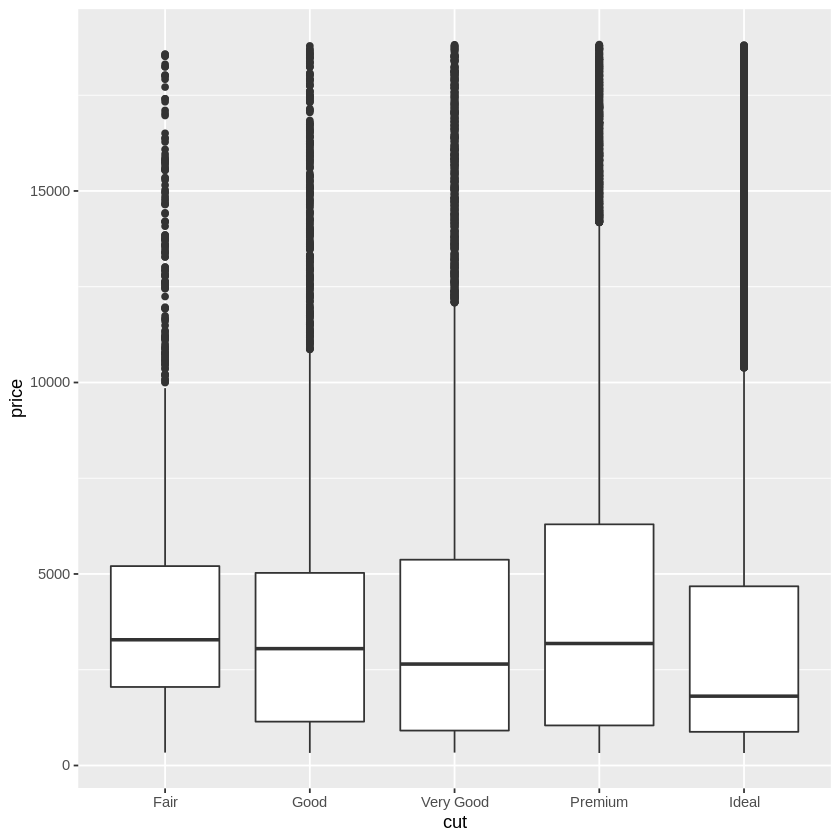

In [ ]:
diamonds %>% ggplot(aes(cut, price)) + geom_boxplot()

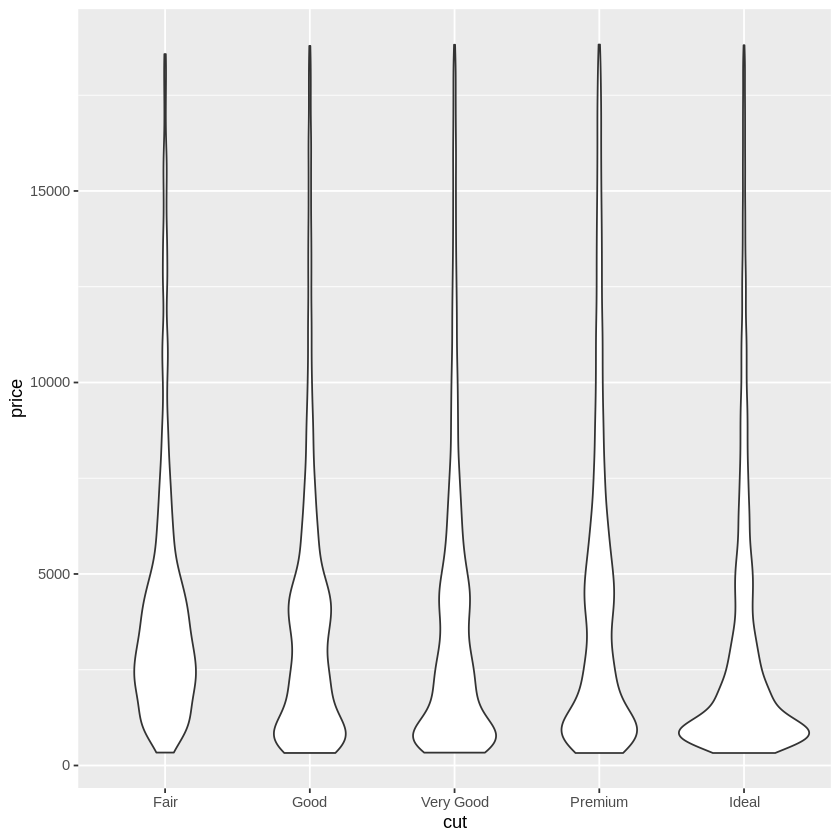

In [ ]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin()